In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import xlabel

In [27]:
df = pd.read_csv(r'C:\Users\User\PyCharmMiscProject\Datasets\new_insurance_data (1) - new_insurance_data (1).csv')
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [41]:
df.isna().sum()
df.dtypes

age                                float64
sex                                 object
bmi                                float64
children                           float64
smoker                              object
Claim_Amount                       float64
past_consultations                 float64
num_of_steps                       float64
Hospital_expenditure               float64
NUmber_of_past_hospitalizations    float64
Anual_Salary                       float64
region                              object
charges                            float64
dtype: object

In [ ]:
for col in df.columns:
  if df[col].dtype == "object":
    df[col] = df[col].fillna(df[col].mode([0]))
  else:
    df[col]=df[col].fillna(df[col].mean())

for col in df.columns:
  if df[col].dtype != "object":
    sb.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [91]:
outlist=['bmi','past_consultations','Hospital_expenditure','Anual_Salary']

for col in outlist:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr

    df=df[(df[col]>= lb) & (df[col]<=ub)]


In [51]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtypes == "object":
        df[col]= le.fit_transform(df[col])
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4720920.992,0.0,5.578497e+07,2,1121.8739
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4329831.676,0.0,1.370089e+07,2,1131.5066
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6884860.774,0.0,7.352311e+07,2,1135.9407
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4274773.550,0.0,7.581968e+07,2,1136.3994
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3787293.921,0.0,2.301232e+07,2,1137.0110
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,19.0,1,29.07,0.0,1,58901.21861,16.0,975702.0,8830423.241,1.0,3.304683e+08,1,17352.6803
1014,30.0,1,22.99,2.0,1,42204.03781,23.0,970426.0,5963405.165,1.0,3.045704e+08,1,17361.7661
1015,19.0,0,28.31,0.0,1,50081.81030,17.0,962557.0,5636755.433,1.0,3.341483e+08,1,17468.9839
1019,28.0,1,23.98,3.0,1,41686.19886,12.0,974518.0,8679934.418,1.0,3.225795e+08,2,17663.1442


In [68]:
X = df.iloc[:,:-1]
Y = df["charges"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.80, random_state=0)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)



,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [92]:
ypred = model.predict(x_test)
result = pd.DataFrame(columns=["actual", "predicted"])
result["actual"] = y_test
result["predicted"] = ypred
result


,actual,predicted
426,5976.83110,6589.193898
1002,16586.49771,12012.160996
34,1631.82120,838.790651
702,9866.30485,10256.344404
560,7731.85785,8614.477011
...,...,...
779,11090.71780,11873.893249
971,14455.64405,16226.568527
388,5377.45780,6549.222924
276,4133.64165,4457.790016


In [72]:
from sklearn.metrics import *
r_2 = r2_score(y_test, ypred)
r_2


0.9517495980373912

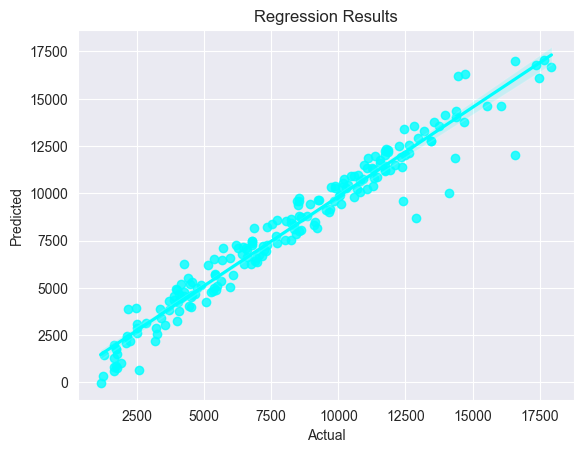

In [90]:
sb.regplot(x = y_test, y = ypred, color = "#00FFFF")
plt.title("Regression Results")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()
